In [37]:
import pandas as pd
import sqlite3
import pygwalker as pyg
import matplotlib.pyplot as plt

In [38]:
mediciones = pd.read_csv("Data/DS_Mediciones_Clima.csv", sep=";")

In [39]:
conn = sqlite3.connect("Base/BD_Mediciones_suelo.sqlite")

In [40]:
cursor = conn.cursor()

In [41]:
suelo = pd.read_sql("SELECT * FROM Mediciones_suelo", con=conn)

In [42]:
mediciones

id   region      fecha   hora  es_dia  temperatura_2m  lluvia_mm  \
0          1   sierra   1/1/2020   0:00       0            10.4        9.2   
1          2    costa   1/1/2020   0:00       0            27.2        0.2   
2          3  oriente   1/1/2020   0:00       0            20.5        5.5   
3          4   sierra   1/1/2020  12:00       1            12.5        3.3   
4          5    costa   1/1/2020  12:00       1            24.0        0.8   
...      ...      ...        ...    ...     ...             ...        ...   
11789  11790  oriente  18/5/2025  12:00       1            22.8        1.4   
11790  11791    costa  19/5/2025   0:00       0            26.9        0.1   
11791  11792  oriente  19/5/2025   0:00       0            19.6        1.7   
11792  11793    costa  19/5/2025  12:00       1            23.2        0.0   
11793  11794  oriente  19/5/2025  12:00       1            21.8        3.5   

       humedad_relativa_2m  temperatura_aparente  radiacion_directa  \
0                       95                  10.0                2.5   
1                       75                  30.9              147.5   
2                       99                  24.1                1.2   
3                      100                  12.4               54.0   
4                       94                  28.9                0.7   
...                    ...                   ...                ...   
11789                   89                  26.8               41.7   
11790                   83                  32.5              160.7   
11791                   98                  22.6                8.0   
11792                   99                  28.4                1.5   
11793                   96                  25.9               20.5   

       cod_clima  presion_msl  
0             61       1018.7  
1             51       1009.4  
2             53       1015.5  
3             53       1018.4  
4             51       1012.1  
...          ...          ...  
11789         51       1016.6  
11790         51       1010.4  
11791         51       1015.8  
11792          1       1011.6  
11793         53       1017.2  

[11794 rows x 12 columns]

In [43]:
suelo

id  velocidad_viento_10m  presion_superficie  temp_suelo_7cm  \
0          1                   2.3               714.1            11.4   
1          2                  10.5              1009.4            29.3   
2          3                   3.3               893.0            21.2   
3          4                   6.0               715.7            12.9   
4          5                   3.4              1012.1            25.7   
...      ...                   ...                 ...             ...   
11789  11790                   2.2               894.8            22.3   
11790  11791                   2.4              1010.4            28.8   
11791  11792                   2.8               892.9            21.0   
11792  11793                   2.2              1011.6            24.1   
11793  11794                   2.5               894.9            21.4   

       humedad_suelo_7cm  temp_suelo_250cm  
0                  0.439              11.1  
1                  0.410              26.8  
2                  0.427              22.2  
3                  0.431              11.1  
4                  0.456              26.8  
...                  ...               ...  
11789              0.405              22.0  
11790              0.418              27.2  
11791              0.416              22.0  
11792              0.423              27.2  
11793              0.430              22.0  

[11794 rows x 6 columns]

In [44]:
unificado = pd.merge(mediciones, suelo, on='id')

In [45]:
unificado

id   region      fecha   hora  es_dia  temperatura_2m  lluvia_mm  \
0          1   sierra   1/1/2020   0:00       0            10.4        9.2   
1          2    costa   1/1/2020   0:00       0            27.2        0.2   
2          3  oriente   1/1/2020   0:00       0            20.5        5.5   
3          4   sierra   1/1/2020  12:00       1            12.5        3.3   
4          5    costa   1/1/2020  12:00       1            24.0        0.8   
...      ...      ...        ...    ...     ...             ...        ...   
11789  11790  oriente  18/5/2025  12:00       1            22.8        1.4   
11790  11791    costa  19/5/2025   0:00       0            26.9        0.1   
11791  11792  oriente  19/5/2025   0:00       0            19.6        1.7   
11792  11793    costa  19/5/2025  12:00       1            23.2        0.0   
11793  11794  oriente  19/5/2025  12:00       1            21.8        3.5   

       humedad_relativa_2m  temperatura_aparente  radiacion_directa  \
0                       95                  10.0                2.5   
1                       75                  30.9              147.5   
2                       99                  24.1                1.2   
3                      100                  12.4               54.0   
4                       94                  28.9                0.7   
...                    ...                   ...                ...   
11789                   89                  26.8               41.7   
11790                   83                  32.5              160.7   
11791                   98                  22.6                8.0   
11792                   99                  28.4                1.5   
11793                   96                  25.9               20.5   

       cod_clima  presion_msl  velocidad_viento_10m  presion_superficie  \
0             61       1018.7                   2.3               714.1   
1             51       1009.4                  10.5              1009.4   
2             53       1015.5                   3.3               893.0   
3             53       1018.4                   6.0               715.7   
4             51       1012.1                   3.4              1012.1   
...          ...          ...                   ...                 ...   
11789         51       1016.6                   2.2               894.8   
11790         51       1010.4                   2.4              1010.4   
11791         51       1015.8                   2.8               892.9   
11792          1       1011.6                   2.2              1011.6   
11793         53       1017.2                   2.5               894.9   

       temp_suelo_7cm  humedad_suelo_7cm  temp_suelo_250cm  
0                11.4              0.439              11.1  
1                29.3              0.410              26.8  
2                21.2              0.427              22.2  
3                12.9              0.431              11.1  
4                25.7              0.456              26.8  
...               ...                ...               ...  
11789            22.3              0.405              22.0  
11790            28.8              0.418              27.2  
11791            21.0              0.416              22.0  
11792            24.1              0.423              27.2  
11793            21.4              0.430              22.0  

[11794 rows x 17 columns]

In [46]:
unificado['fecha'] = pd.to_datetime(unificado['fecha'], format='%d/%m/%Y')

In [47]:
# del unificado['hora']

In [48]:
unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11794 entries, 0 to 11793
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11794 non-null  int64         
 1   region                11794 non-null  object        
 2   fecha                 11794 non-null  datetime64[ns]
 3   hora                  11794 non-null  object        
 4   es_dia                11794 non-null  int64         
 5   temperatura_2m        11794 non-null  float64       
 6   lluvia_mm             11794 non-null  float64       
 7   humedad_relativa_2m   11794 non-null  int64         
 8   temperatura_aparente  11794 non-null  float64       
 9   radiacion_directa     11794 non-null  float64       
 10  cod_clima             11794 non-null  int64         
 11  presion_msl           11794 non-null  float64       
 12  velocidad_viento_10m  11794 non-null  float64       
 13  presion_superfic

In [49]:
pyg.walk(unificado)

Box(children=(HTML(value='\n<div id="ifr-pyg-000635d0a44773f5OU6dPJ0h5SfIpZvk" style="height: auto">\n    <hea…

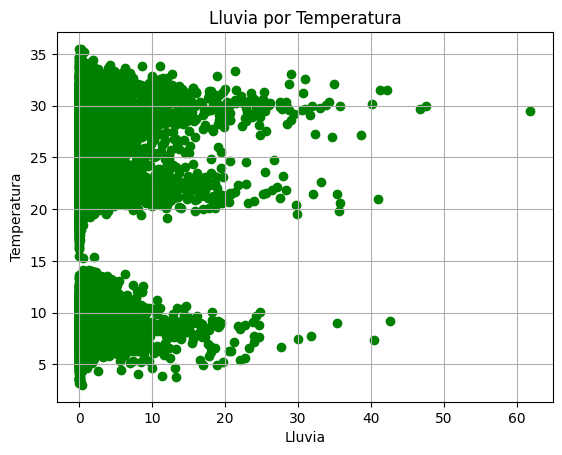

In [50]:
plt.scatter(unificado['lluvia_mm'], unificado['temperatura_aparente'], marker='o', linestyle='-', color='green')
plt.title('Lluvia por Temperatura')
plt.xlabel('Lluvia')
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()

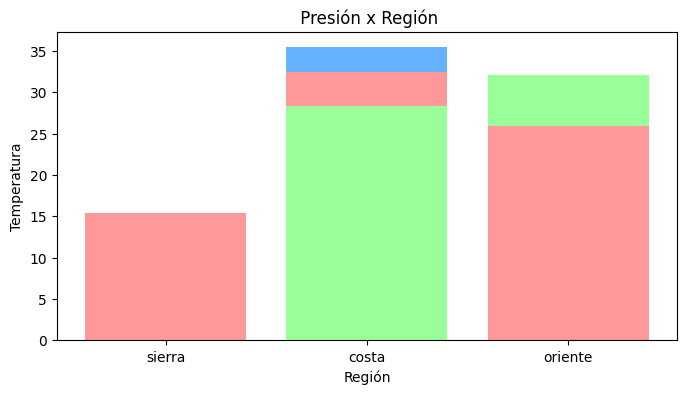

In [51]:
colores = ['#FF9999', '#66B2FF', '#99FF99']
plt.figure(figsize=(8,4))
plt.bar(unificado['region'], unificado['temperatura_aparente'], color=colores)
plt.title(' Presión x Región')
plt.xlabel('Región')
plt.ylabel('Temperatura')
plt.show()

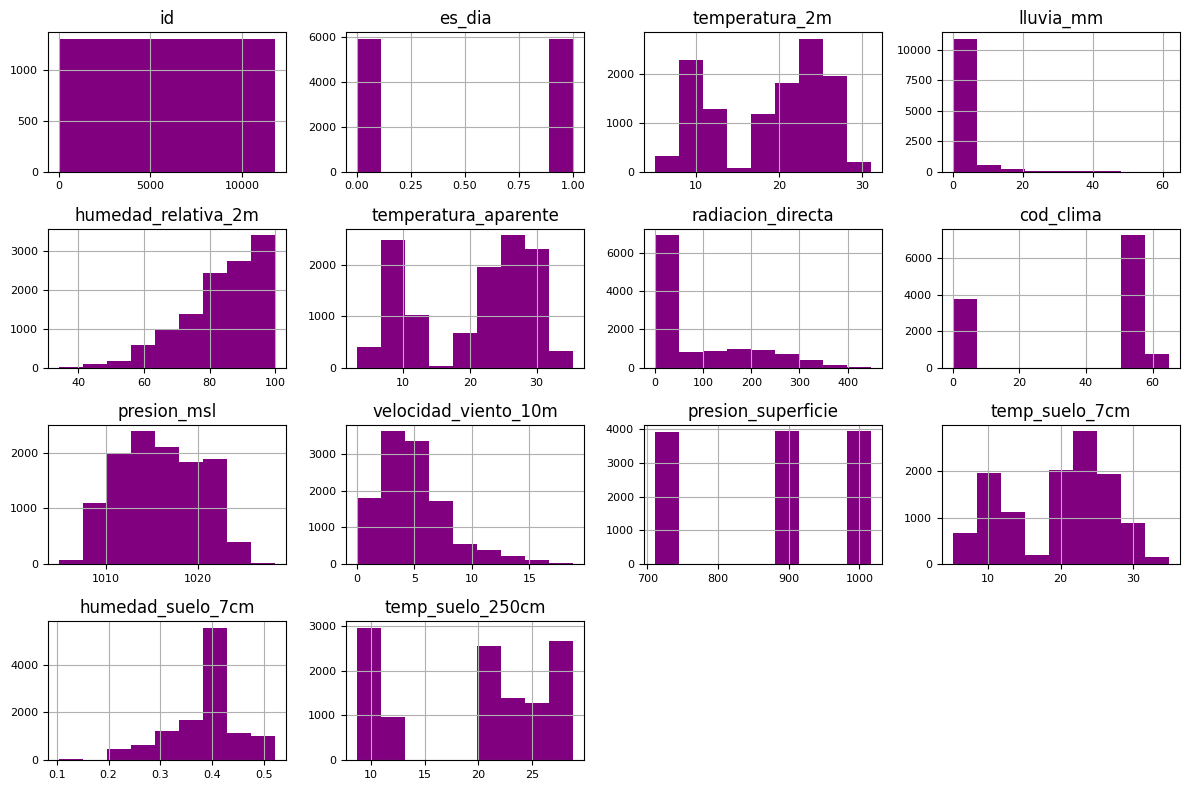

In [52]:
unificado.select_dtypes(include=['number']).hist(
    bins=9,
    figsize=(12, 8),
    color='purple',
    xlabelsize=8,
    ylabelsize=8
)
plt.tight_layout()
plt.show()

In [53]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, DateRangeSlider, Select, HoverTool, Panel, Tabs
from bokeh.layouts import column, row
from bokeh.palettes import Category10, Spectral4
from bokeh.transform import factor_cmap
from bokeh.models import Tabs, TabPanel

In [56]:
source = ColumnDataSource(unificado)

p = figure(title="Gráfico de dispersión con 11,000 puntos", 
           tools="pan,wheel_zoom,box_zoom,reset,save")

p.scatter('lluvia_mm', 'temperatura_2m', source=source, size=5, alpha=0.6)

output_notebook()
show(p)

Loading BokehJS ...

In [57]:
p = figure(title="Gráfico interactivo", 
           tools="hover,pan,wheel_zoom,box_zoom,reset",
           tooltips=[("Temperatura", "@temperatura_aparente"), ("Radiacion", "@radiacion_directa")])

p.circle('temperatura_aparente', 'radiacion_directa', source=source, size=8, 
         color='navy', alpha=0.5, 
         legend_field='categoria')

p.legend.title = 'Categorías'
p.legend.click_policy = "hide"  # Permite hacer clic para ocultar/mostrar categorías

output_notebook()
show(p)

Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : LegendItem(id='p1598', ...)


In [58]:
df_grafico = unificado.sample(frac=0.2)
source_sample = ColumnDataSource(df_grafico)

p = figure(title="Gráfico con muestreo (2,200 puntos)")
p.scatter('humedad_relativa_2m', 'humedad_suelo_7cm', source=source_sample, size=5, alpha=0.6)

output_notebook()
show(p)

Loading BokehJS ...

In [70]:
# Crear ColumnDataSource inicial
source = ColumnDataSource(unificado)

# 1. Controles de filtrado
select_region = Select(title="Seleccionar Región:", 
                      options=['Todas'] + sorted(unificado['region'].unique().tolist()),
                      value='Todas')

date_range_slider = DateRangeSlider(title="Rango de Fechas",
                                  start=unificado['fecha'].min(),
                                  end=unificado['fecha'].max(),
                                  value=(unificado['fecha'].min(), unificado['fecha'].max()),
                                  step=1)

In [71]:
# 2. Función de actualización
def update_data(attr, old, new):
    region = select_region.value
    start_date, end_date = date_range_slider.value
    
    # Aplicar filtros
    filtered = unificado[
        (unificado['fecha'] >= start_date) & 
        (unificado['fecha'] <= end_date)
    ]
    
    if region != 'Todas':
        filtered = filtered[filtered['region'] == region]
    
    source.data = ColumnDataSource.from_df(filtered)

In [84]:
# Asignar callbacks
select_region.on_change('value', update_data)
date_range_slider.on_change('value', update_data)

# 3. Crear gráficos
def crear_grafico(variable, titulo, color):
    p = figure(width=800, height=300, x_axis_type='datetime',
              title=titulo, tools="pan,wheel_zoom,box_zoom,reset")
    
    # Gráfico por región si no hay filtro
    if select_region.value == 'Todas':
        for i, region in enumerate(unificado['region'].unique()):
            region_data = ColumnDataSource(unificado[unificado['region'] == region])
            p.line('fecha', variable, source=region_data, 
                  line_width=2, color=Spectral4[i], legend_label=region)
            p.circle('fecha', variable, source=region_data, 
                    size=4, color=Spectral4[i], alpha=0.3)
    else:
        p.line('fecha', variable, source=source, 
              line_width=2, color=color)
        p.circle('fecha', variable, source=source, 
                size=6, color=color, alpha=0.5)
    
    # Configuración común
    p.add_tools(HoverTool(
        tooltips=[
            ("Fecha", "@fecha{%F}"),
            ("Región", "@region"),
            (titulo, f"@{variable}{{0.00}}")
        ],
        formatters={'@fecha': 'datetime'}
    ))
    p.legend.location = "top_left"
    p.legend.click_policy = "hide"
    return p

In [85]:
# 4. Crear pestañas para cada variable

tab1 = TabPanel(child=plot_lluvia, title="Lluvia")
tab2 = TabPanel(child=plot_temp, title="Temperatura")
tab3 = TabPanel(child=plot_presion, title="Presión")
tab4 = TabPanel(child=plot_humedad, title="Humedad")

#tab1 = Panel(child=crear_grafico('lluvia_mm', 'Precipitación (mm)', Category10[4][0]), title="Lluvia")
#tab2 = Panel(child=crear_grafico('temperatura_2m', 'Temperatura (°C)', Category10[4][1]), title="Temperatura")
#tab3 = Panel(child=crear_grafico('presion_msl', 'Presión Atmosférica (hPa)', Category10[4][2]), title="Presión")
#tab4 = Panel(child=crear_grafico('humedad_relativa_2m', 'Humedad Relativa (%)', Category10[4][3]), title="Humedad")

In [86]:
# 5. Gráfico comparativo (solo cuando se selecciona 'Todas')

#(unificado['fecha'] >= date_range_slider.value[0]) & 
 #       (unificado['fecha'] <= date_range_slider.value[1])

def crear_comparativo():
    p = figure(width=800, height=300, x_range=unificado['region'].unique(),
              title="Comparación Promedio por Región", toolbar_location=None)
    
    # Calcular promedios filtrados

    start_date = pd.to_datetime(date_range_slider.value[0])
    end_date = pd.to_datetime(date_range_slider.value[1]) 
    
    filtered = unificado[
        (unificado['fecha'] >= start_date) & 
        (unificado['fecha'] <= end_date)
    ]
    avg_data = filtered.groupby('region').mean().reset_index()
    source_avg = ColumnDataSource(avg_data)
    
    # Variables a comparar
    variables = ['Lluvia', 'Temperatura', 'presion', 'humedad']
    
    # Posiciones para barras agrupadas
    x = [(region, var) for region in avg_data['region'] for var in variables]
    counts = sum(zip(avg_data['Lluvia'], avg_data['Temperatura'], 
                avg_data['presion'], avg_data['humedad']), ())
    
    source_stack = ColumnDataSource(data=dict(x=x, counts=counts))
    
    p.vbar(x='x', top='counts', source=source_stack, width=0.9, 
          color=factor_cmap('x', palette=Spectral4, factors=variables, start=1, end=2))
    
    p.x_range.range_padding = 0.1
    p.xgrid.grid_line_color = None
    p.xaxis.major_label_orientation = 1
    p.legend.orientation = "horizontal"
    p.legend.location = "top_center"
    
    return p

In [87]:
# 6. Layout final
dashboard = column(
    row(select_region, date_range_slider),
    Tabs(tabs=[tab1, tab2, tab3, tab4]),
    crear_comparativo()
)

show(dashboard)

KeyError: 'Lluvia'

In [ ]:
# Datos de serie temporal (ejemplo)
fechas = pd.date_range('2023-01-01', periods=100)
serie = {
    'fecha': fechas,
    'valor': np.cumsum(np.random.randn(100)) + 50,
    'tendencia': np.linspace(50, 70, 100)
}

source_line = ColumnDataSource(serie)

# Crear figura
p_line = figure(width=800, height=300, x_axis_type='datetime',
               tools="hover,pan,wheel_zoom,box_zoom,reset",
               title="Serie Temporal Interactiva")

# Añadir líneas
p_line.line('fecha', 'valor', source=source_line, line_width=2, color='navy', legend_label="Valor")
p_line.line('fecha', 'tendencia', source=source_line, line_width=2, color='red', legend_label="Tendencia")

# Tooltip personalizado
hover_line = HoverTool(
    tooltips=[
        ("Fecha", "@fecha{%F}"),
        ("Valor", "@valor{0.00}"),
        ("Tendencia", "@tendencia{0.00}")
    ],
    formatters={'@fecha': 'datetime'}
)

p_line.add_tools(hover_line)
p_line.legend.location = "top_left"

show(p_line)